<a href="https://colab.research.google.com/github/MeghKaa/Applied-Linear-Algebra/blob/main/VectorsAndMatrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$${\color{yellow}{\text{Applied Linear Algebra: Vectors and Matrices}}}$$



---

Restart the session after executing the following cell

---

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-h

In [ ]:
!pip install yfinance --quiet

---

Load essential libraries

---

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
# import gensim.downloader
from nltk.tokenize import word_tokenize
import yfinance as yf
import seaborn as sns

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]])
print(X)
print(X.shape)
print(type(X))
print(X[0]) # this is patient-0 information which is a rank-1 tensor
print(X[0, :]) # patient-0 all features
print('------------')
print(X[0, 2]) # feature-2 of patient-0, temperature of patient-0
print(X[:, 2]) # feature-2 of all patients, temperature of all patients

tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
torch.Size([6, 5])
<class 'torch.Tensor'>
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
------------
tensor(37.3000)
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])


---

**Convert a PyTorch object into a numpy array**

---

In [ ]:
print(X.numpy())
print(type(X.numpy()))

[[ 72.  120.   37.3 104.   32.5]
 [ 85.  130.   37.  110.   14. ]
 [ 68.  110.   38.5 125.   34. ]
 [ 90.  140.   38.  130.   26. ]
 [ 84.  132.   38.3 146.   30. ]
 [ 78.  128.   37.2 102.   12. ]]
<class 'numpy.ndarray'>


---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
# Vector addition
print(X[1, :] + X[2, :])

# Vector subtraction
print(X[1, :] - X[2, :])

# Scalar-vector multiplication
print(X[:, 2])
print((9/5)*X[:, 2]+32) # 0peration not defined in pen & paper but in computation is referred to as
# broadcasting

# Average patient
x_avg = (1/6)*(X[0, :] + X[1, :] + X[2, :] + X[3, :] + X[4, :] + X[5, :])
print(x_avg)
x_avg = torch.mean(X, dim = 0) # dim = 0 means top-to-bottom or along dim-0

# Another broadcasting example
print(X)
print(x_avg)
print(X - x_avg)

tensor([153.0000, 240.0000,  75.5000, 235.0000,  48.0000])
tensor([ 17.0000,  20.0000,  -1.5000, -15.0000, -20.0000])
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])
tensor([ 99.1400,  98.6000, 101.3000, 100.4000, 100.9400,  98.9600])
tensor([ 79.5000, 126.6667,  37.7167, 119.5000,  24.7500])
tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
tensor([ 79.5000, 126.6667,  37.7167, 119.5000,  24.7500])
tensor([[ -7.5000,  -6.6667,  -0.4167, -15.5000,   7.7500],
        [  5.5000,   3.3333,  -0.7167,  -9.5000, -10.7500],
        [-11.5000, -16.6667,   0.7833,   5.5000,   9.2500],
        [ 10.5000,  13.3333,   0.2833,  10.5000,   1.2500],
        [  4.5000,   5.3333,   

---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [ ]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

NameError: name 'gensim' is not defined

---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [ ]:
# Cricket without Tendulkar
a = model['cricket'] - model['tendulkar']

# Football without Messi
b = model['football'] - model['messi']
print(a)
print(b)

# How different is cricket-without-tendulkar from
# football-without-messi?
print(a-b)

[-0.7716      0.41267997 -1.725968   -0.10445005 -1.1475699  -0.854661
 -1.089      -0.08342999  0.62349    -1.67822    -0.2488078  -0.49199998
  0.18756002 -1.67098     0.6117872   0.42784432  1.05656     0.91583097
 -0.03299999 -0.04422501  0.200326   -0.33737004  0.31068     1.37842
 -1.13689    -0.57445    -0.70685995  0.41552    -0.28937     0.54485
  1.0492998   0.62732    -0.8105     -1.27723    -0.02612001  0.53963
 -0.14065999 -0.738244   -0.30487    -1.18129     0.05651999 -0.993618
 -0.911399   -0.09289992  0.535432    0.26259995 -0.63031     0.64473
  0.77843     0.15099996]
[-2.06898     0.66804904 -1.077512    0.79964995 -0.27109998 -0.26289004
 -0.881       0.377503   -0.10869002 -2.47329    -0.23453003 -0.58438
  0.10404003 -0.52671003 -0.03030002  0.237764    0.19168997  1.60344
 -0.42980003  0.59058     0.59800005 -0.67075     0.45888     1.4538
 -1.15642    -1.63534    -1.1248189  -0.20879    -0.00812     0.25545004
  1.92044     0.30049008  0.19949001 -0.675167   -0

---

Understanding pen & paper versions of tensors w.r.t. their representations in the code

---

In [ ]:
# Pen & paper: 3-vector, Code: rank-1 tensor
a_vector = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(a_vector)
print(a_vector.shape)
print('-------')
# Pen & paper: 1x3-matrix, Code: rank-2 tensor
a_matrix_version1 = torch.tensor([[1.0, 2.0, 3.0]], dtype = torch.float64)
print(a_matrix_version1)
print(a_matrix_version1.shape)
# Pen & paper: 3x1-matrix, Code: rank-2 tensor
a_matrix_version2 = torch.tensor([[1.0], [2.0], [3.0]], dtype = torch.float64)
print(a_matrix_version2)
print(a_matrix_version2.shape)

tensor([1., 2., 3.], dtype=torch.float64)
torch.Size([3])
-------
tensor([[1., 2., 3.]], dtype=torch.float64)
torch.Size([1, 3])
tensor([[1.],
        [2.],
        [3.]], dtype=torch.float64)
torch.Size([3, 1])


---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP). Assume that admission time is 9AM.

---

In [ ]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# dim-0 as 4 hourly timestamps,
# dim-1 as 3 patients, and
# dim-2 as 2 features (HR and BP)
# T = torch.tensor([[[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]]])
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)

tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])


---

**Accessing elements of a tensor**

---

In [ ]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. dim-0, position 2 w.r.t. dim-1,
# position-1 w.r.t dim-2
print(T[3, 2, 1]) # BP of patient-2 at noon


# Element-0 of object T which is also the info for all patients at
# admission time 9AM
print(T[0]) # patients' info at admission time
print(T[-1]) # first element of T from the tail, patients' info at noon


# Patient-2 info at noon
T[-1, 2]


tensor(132.)
tensor([[ 74., 128.],
        [ 79., 116.],
        [ 71., 116.]])
tensor([[ 82., 126.],
        [ 76., 156.],
        [ 82., 132.]])


tensor([ 82., 132.])

---

Understanding shapes

---

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
print(a.shape)
a = torch.tensor([[1.0, 2.0, 3.0]])
print(a.shape)
a = torch.tensor([[[1.0, 2.0, 3.0]]])
print(a)
print(a.shape)

torch.Size([3])
torch.Size([1, 3])
tensor([[[1., 2., 3.]]])
torch.Size([1, 1, 3])


---

**Broadcasting**

---

In [ ]:
# A simple broadcasting example
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0])
print(a.shape)
print(b.shape)
print(a-b)

torch.Size([3])
torch.Size([1])
tensor([-3., -2., -1.])


In [ ]:
# How to add a new axis to a tensor using the unsqueeze() function
#print(T)
#print(T.shape)
T_patient0 = T[:, 0, :]
print(T_patient0)
print(T_patient0.shape)
print('---------')
T_patient0_new = torch.unsqueeze(T_patient0, 1)
print(T_patient0_new)
print(T_patient0_new.shape)
print('---------')
print(T)
print(T.shape)

tensor([[ 74., 128.],
        [ 78., 118.],
        [ 84., 138.],
        [ 82., 126.]])
torch.Size([4, 2])
---------
tensor([[[ 74., 128.]],

        [[ 78., 118.]],

        [[ 84., 138.]],

        [[ 82., 126.]]])
torch.Size([4, 1, 2])
---------
tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])
torch.Size([4, 3, 2])


In [ ]:
# How different are the patients from patient-0?
#T - T_patient0 # does not work for broadcasting
# T - T_patient0

# # How different are the patients compared to their time at admission
T-T_patient0_new

tensor([[[  0.,   0.],
         [  5., -12.],
         [ -3., -12.]],

        [[  0.,   0.],
         [  4.,   6.],
         [ -6.,  10.]],

        [[  0.,   0.],
         [  0.,  -8.],
         [-10., -18.]],

        [[  0.,   0.],
         [ -6.,  30.],
         [  0.,   6.]]])

---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [ ]:
# Last patient's info at all timestamps
T[:, -1, :]

tensor([[ 71., 116.],
        [ 72., 128.],
        [ 74., 120.],
        [ 82., 132.]])

---

Broadcasting exercise

---

In [ ]:
T = torch.randint(-5, 6, (4, 5, 3))
print(T)
v = torch.tensor([1.0, 2.0, 3.0])
print(v)

tensor([[[-5,  3,  5],
         [ 0,  1,  5],
         [-2, -1,  1],
         [ 1, -5,  3],
         [ 3, -1,  1]],

        [[ 2, -1,  3],
         [-4, -5, -3],
         [ 3, -1, -5],
         [ 5,  4, -3],
         [-1, -3, -2]],

        [[-5, -5,  1],
         [ 4, -3, -5],
         [ 3, -4,  5],
         [-2,  2,  0],
         [ 2,  1,  5]],

        [[ 5, -3, -3],
         [ 2,  5,  1],
         [-4, -1, -3],
         [ 3,  3, -3],
         [-3,  4,  3]]])
tensor([1., 2., 3.])


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\end{bmatrix}\Rightarrow \lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\\\vdots\\a_n\end{bmatrix}\Rightarrow\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [ ]:
## l2 norm of a vector
x = torch.tensor([76.0, 124.0], dtype = torch.float64)
print(x)
torch.norm(x)

tensor([ 76., 124.], dtype=torch.float64)


tensor(145.4373, dtype=torch.float64)


---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [ ]:
## Dot product of vectors
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)
torch.dot(a, b)

tensor(32., dtype=torch.float64)

---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [ ]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])
c = torch.tensor([-2.0, 1.0])
d = torch.tensor([-1.0, -2.0])
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

tensor(10.)
tensor(0.)
tensor(-5.)


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [ ]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([2.0, 1.0])

# Linear difference between x and y
print(torch.norm(x - y))

# Angle difference between x and y in radians
print(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y))))

# Angle difference between x and y in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y)))))

tensor(1.4142)
tensor(0.6435)
tensor(36.8699)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [ ]:
a = torch.tensor(model['cricket'] - model['tendulkar'], dtype = torch.float64)
b = torch.tensor(model['football'] - model['messi'], dtype = torch.float64)

# Linear difference between and a and b
print(torch.norm(a-b))

# Angle difference between a and b in radians
print(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b))))

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

tensor(4.2349, dtype=torch.float64)
tensor(0.7420, dtype=torch.float64)
tensor(42.5126, dtype=torch.float64)


In [ ]:
c = torch.tensor(model['soup'] - model['salt'], dtype = torch.float64)

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

# Angle difference between a and c in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, c) / (torch.norm(a) * torch.norm(c)))))

# cricket-without-tendulkar has approximately the same similarity w.r.t.
# football-without-messi and tennis-without-federer

tensor(42.5126, dtype=torch.float64)
tensor(103.5210, dtype=torch.float64)



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [ ]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)

# Element-wise multiplication (Hadamard product)
print(a*b)
print(torch.mul(a, b))

tensor([ 4., 10., 18.], dtype=torch.float64)
tensor([ 4., 10., 18.], dtype=torch.float64)


---

A matrix-vector product is simply a sequence of dot products of the rows of the matrix (seen as vectors) with the vector

![matvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [ ]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication
print(torch.matmul(A, x))

tensor([0., 0.])


---

Here we create a simple sentence in English and tokenize it

---

In [ ]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

---

Matrix-matrix product using patient data matrix and a weights matrix:

![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

$$\mathbf{Z} = \mathbf{XW}.$$

---

In [ ]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64)
print(f'Weights matrix:\n {W}')

# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')
# The raw scores are also referred to as the logits

Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)


---

**Version-1** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about a particular patient.*

![matrix-matrix product version-1](https://1drv.ms/i/c/37720f927b6ddc34/IQQdAOCwtndURKA-h4yvpTqlAYjBjlcweRSeMYkPvf7dwmQ?width=660)

$$\begin{align*}[\mathbf{Z}]_{i,j} &= (i,j)\text{-th element of }\mathbf{Z}\\&=\text{what the }j\text{th neuron learns about the } i\text{th patient}\\&=\mathbf{x}^{(i)}\cdot\mathbf{w}_j\\& = {\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{w}_j\\\Rightarrow \underbrace{[\mathbf{Z}]_{{\color{yellow}0},{\color{cyan}2}}}_{{\color{yellow}0}\text{th patient},\,{\color{cyan}2}\text{nd neuron}} &= \mathbf{x}^{({\color{yellow}0})}\cdot\mathbf{w}_{{\color{cyan}2}}\\ &= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}\cdot\begin{bmatrix}0.3\\0.5\\0.1\\-1.0\\-0.8\end{bmatrix}\\ &= -44.67.\end{align*}$$

---

In [ ]:
## The (0, 2)-th element of the matrix-matrix product XW
torch.dot(X[0, :], W[:, 2])
#torch.matmul(X[0, :], W[:, 2]) (not recommended)

tensor(-44.6700, dtype=torch.float64)

---

**Version-2** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about all the patients.*

![matrix-matrix product version-2](https://1drv.ms/i/c/37720f927b6ddc34/IQRm1-w-6TG0R4C4J4BizyzyAWIbcHzbEjgmx-0JFREdHsE?width=660)

$$\begin{align*}\mathbf{z}_j &= \mathbf{X}\mathbf{w}_j\\&=\text{what the } j\text{th neuron learns about the all the patients}\\&=w_{j,0}\times\textbf{HR}+w_{j,1}\times\textbf{BP}+w_{j,2}\times\textbf{Temp}+w_{j,3}\times\textbf{Sugar}+w_{j,4}\times\textbf{Vitamin D}\\&= w_{j,0}\mathbf{x}_0+w_{j,1}\mathbf{x}_1+w_{j,2}\mathbf{x}_2+w_{j,3}\mathbf{x}_3+w_{j,4}\mathbf{x}_4\\\Rightarrow\underbrace{\mathbf{z}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron understanding}} &= \underbrace{\mathbf{X}}_{\color{yellow}{\text{all patients}}}\ \underbrace{\mathbf{w}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron weights}}\\&= {\color{cyan}{-0.1}}\times\begin{bmatrix}{\color{yellow}{72}}\\{\color{yellow}{85}}\\{\color{yellow}{68}}\\{\color{yellow}{90}}\\{\color{yellow}{84}}\\{\color{yellow}{78}}\end{bmatrix}+{\color{cyan}{0.9}}\times\begin{bmatrix}{\color{yellow}{120}}\\{\color{yellow}{130}}\\{\color{yellow}{110}}\\{\color{yellow}{140}}\\{\color{yellow}{132}}\\{\color{yellow}{128}}\end{bmatrix}+({\color{cyan}{-1.5}})\times\begin{bmatrix}{\color{yellow}{37.3}}\\{\color{yellow}{37.0}}\\{\color{yellow}{38.5}}\\{\color{yellow}{38.0}}\\{\color{yellow}{38.3}}\\{\color{yellow}{37.2}}\end{bmatrix}+{\color{cyan}{0.1}}\times\begin{bmatrix}{\color{yellow}{104}}\\{\color{yellow}{110}}\\{\color{yellow}{125}}\\{\color{yellow}{130}}\\{\color{yellow}{146}}\\{\color{yellow}{102}}\end{bmatrix}+({\color{cyan}{-1.2}})\times\begin{bmatrix}{\color{yellow}{32.5}}\\{\color{yellow}{14}}\\{\color{yellow}{34}}\\{\color{yellow}{26}}\\{\color{yellow}{30}}\\{\color{yellow}{12}}\end{bmatrix}\\&=\begin{bmatrix}16.25\\47.20\\6.15\\41.80\\31.55\\47.40\end{bmatrix}.\end{align*}$$



---

In [ ]:
## The 0-th column of the matrix-matrix product XW
torch.matmul(X, W[:, 0])

tensor([16.2500, 47.2000,  6.1500, 41.8000, 31.5500, 47.4000],
       dtype=torch.float64)

 ---

**Version-3** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What all neurons understand about a particular patient.*

![matrix-matrix product version-3](https://1drv.ms/i/c/37720f927b6ddc34/IQRfO-qEJQ9mQYLH_f-lyjeQAaWV4FrDjTjaEHJpPB1PmCg?width=660)

$$\begin{align*}{\mathbf{z}^{(i)}}^\mathrm{T}&={\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{W}\\&= \text{what is learned about the }i\text{th patient by all the neurons}\\&=i\text{th HR }\times{\mathbf{w}^{(0)}}^\mathrm{T}+i\text{th BP }\times{\mathbf{w}^{(1)}}^\mathrm{T}+i\text{th Temp }\times{\mathbf{w}^{(2)}}^\mathrm{T}+i\text{th Sugar }\times{\mathbf{w}^{(3)}}^\mathrm{T}+i\text{th Vitamin D }\times{\mathbf{w}^{(4)}}^\mathrm{T}\\&=x^{(i)}_0\times{\mathbf{w}^{(0)}}^\mathrm{T}+x^{(i)}_1\times{\mathbf{w}^{(1)}}^\mathrm{T}+x^{(i)}_2\times{\mathbf{w}^{(2)}}^\mathrm{T}+x^{(i)}_3\times{\mathbf{w}^{(3)}}^\mathrm{T}+x^{(i)}_4\times{\mathbf{w}^{(4)}}^\mathrm{T}\\\underbrace{\Rightarrow{{\mathbf{z}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient understanding}}&=\underbrace{{{\mathbf{x}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient}}\ \underbrace{\mathbf{W}}_{{\color{cyan}{\text{all neurons}}}}\\ &= {\color{yellow}{72}}\times\begin{bmatrix}{\color{cyan}{-0.1}} & {\color{cyan}{0.5}} & {\color{cyan}{0.3}}\end{bmatrix} \\&+ {\color{yellow}{120}}\times\begin{bmatrix}{\color{cyan}{0.9}} & {\color{cyan}{0.3}} & {\color{cyan}{0.5}}\end{bmatrix}\\&+{\color{yellow}{37.3}}\times\begin{bmatrix}{\color{cyan}{-1.5}} & {\color{cyan}{0.4}} & {\color{cyan}{0.1}}\end{bmatrix}\\&+{\color{yellow}{104}}\times\begin{bmatrix}{\color{cyan}{0.1}} & {\color{cyan}{0.1}} & {\color{cyan}{-1.0}}\end{bmatrix}\\&+{\color{yellow}{32.5}}\times\begin{bmatrix}{\color{cyan}{-1.2}} & {\color{cyan}{0.5}} & {\color{cyan}{-0.8}}\end{bmatrix}\\&=\begin{bmatrix}16.25 & 113.57 & 7.33\end{bmatrix}.\end{align*}$$


---

In [ ]:
Z

tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)

In [ ]:
## The 0-th row of the matrix-matrix product XW
torch.matmul(X[0, :], W)

tensor([ 16.2500, 113.5700, -44.6700], dtype=torch.float64)

---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

---

The softmax function: takes a $k$-vector $\mathbf{z}$ as input and returns a vector $\mathbf{a}$ of the same shape as the output which is referred to as the softmax-activated scores.

$\begin{align*}\mathbf{a}&=\text{softmax}(\mathbf{z})=\begin{bmatrix}\dfrac{e^{z_1}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\dfrac{e^{z_2}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\vdots\\\dfrac{e^{z_k}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\end{bmatrix}.\end{align*}$

In the following example, we consider a raw scores vector $\mathbf{z}$ with 3 components which leads to the softmax-activated scores vectors $\mathbf{a}$ which can be interpreted as the predicted probabilities that the sample belongs to each one of the output classes:

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)


---

The softmax function converts these raw scores into a probability distribution:

softmax
(
𝑧
𝑖


	​


Key properties:

Each output is between 0 and 1.

All outputs sum to 1.

The largest logit gets the highest probability (but smoothly, not a hard 0/1).

In [ ]:
z = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(z)
softmax = torch.nn.Softmax(dim = 0)
a = softmax(z)
print(a)
print(torch.sum(a))

tensor([1., 2., 3.], dtype=torch.float64)
tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)


In [ ]:
# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')

# Calculate the softmax scores
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'Softmax scores matrix:\n {A}')

Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)
Softmax scores matrix:
 tensor([[5.4258e-43, 1.0000e+00, 1.8934e-69],
        [7.2250e-30, 1.0000e+00, 4.3071e-62],
        [1.1840e-46, 1.0000e+00, 5.2561e-81],
        [2.9989e-38, 1.0000e+00, 4.0618e-78],
        [5.6892e-42, 1.0000e+00, 3.1189e-88],
        [2.9737e-27, 1.0000e+00, 9.8488e-57]], dtype=torch.float64)


---

Standardization of data to get rid of the effects of units.

The standard deviation of a vector is a measure of how much the components or elements of that vector typically deviate from their average value. For an $n$-vector $\mathbf{x},$ the standard deviation is denoted and calculated as
$$\mathbf{x} = \begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}\Rightarrow\text{std}(\mathbf{x}) = \sqrt{\frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}}.$$ The quantity inside the square root above is the average squared deviation which is also called the variance denoted as $$\text{var}(\mathbf{x}) = \frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}.$$

This means $\text{std}(\mathbf{x}) = \sqrt{\text{var}(\mathbf{x})}.$

A large standard deviation indicates that the components of the vector typically deviate a lot from their average value or mean.

The following component plot of a vector of heart rate values has the 1-standard deviation-above and below the mean represented as red-dotted lines:

![standard deviation](https://1drv.ms/i/c/37720f927b6ddc34/IQQB_uF-TUO8SpoodLWz7sQPAc4POmYfY3hPjlX3vpYfKlY?width=540)

---

In [ ]:
# Heart rate vector
a = X[:, 0]
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]

#print(f'Blood pressure vector:\n {b}')
# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate is
# obtained by subtracting the mean heart rate and dividing by the
# deviation of the heart rates
z = a_mc / s #same as (a-np.mean(a)) / np.std(a)
print(f'Standardized heart rate vector:\n{z}')

Heart rate vector:
 tensor([72., 85., 68., 90., 84., 78.], dtype=torch.float64)
Average heart rate: 79.5
Deviations in heart rate vector:
 tensor([ -7.5000,   5.5000, -11.5000,  10.5000,   4.5000,  -1.5000],
       dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([ 56.2500,  30.2500, 132.2500, 110.2500,  20.2500,   2.2500],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 58.583333333333336
Standard deviation of the heart rate: 7.65397500213669
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

Suppose heart rate is measured in beats per hour instead of beats per minute. How do the z-scores look like now?

---

In [ ]:
# Suppose heart rate is measured in beats per hour instead of beats per minute
a = X[:, 0]*60
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate
z = a_mc / s
print(f'Standardized heart rate vector:\n{z}')
# The z-scores are the same as before when the heart rate was in beats per minute

Heart rate vector:
 tensor([4320., 5100., 4080., 5400., 5040., 4680.], dtype=torch.float64)
Average heart rate: 4770.0
Deviations in heart rate vector:
 tensor([-450.,  330., -690.,  630.,  270.,  -90.], dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([202500., 108900., 476100., 396900.,  72900.,   8100.],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 210900.0
Standard deviation of the heart rate: 459.23850012820134
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

One-hot encoding of the true output labels


![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

---

In [ ]:
# The following does not work in PyTorch
#y = torch.tensor(['non-diabetic', 'diabetic'])

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
print(y)
print(type(y))
print(y.shape)
y = y.reshape(-1, 1)
print('------')
print(y)
print(type(y))
print(y.shape)
print('-------')
# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
print(Y)

['non-diabetic' 'diabetic' 'non-diabetic' 'pre-diabetic' 'diabetic'
 'pre-diabetic']
<class 'numpy.ndarray'>
(6,)
------
[['non-diabetic']
 ['diabetic']
 ['non-diabetic']
 ['pre-diabetic']
 ['diabetic']
 ['pre-diabetic']]
<class 'numpy.ndarray'>
(6, 1)
-------
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)


---

The forward propagation

---

In [ ]:
# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# The one-hot encoded true output labels matrix
print(f'One-hot encoded true output labels matrx:\n{Y}')

# Calculate the raw scores using the standardized data matrix
# and the weights matrix
print(f'The weights matrix:\n{W}')
Z = torch.matmul(X_std, W)
print(f'The raw scores matrix:\n{Z}')

# Calculate the softmax-activated scores matrix
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'The softmax-activated raw scores matrix:\n{A}')

# Quantify the unhappiness w.r.t. the current set of weights
print(f'One-hot encoded true output labels matrix:{Y}')
print(f'Hadamard product of Y and A:{Y*A}')
print(torch.sum(Y*A, dim=1))
print(-torch.log(torch.sum(Y*A, dim=1)))
print(torch.mean(-torch.log(torch.sum(Y*A, dim=1))))
# Calculate the average training loss
L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
print(f'Average training loss = {L}')

The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676]], dtype=torch.float64)
One-hot encoded true output labels matrx:
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
The weights matrix:
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
The raw scores matrix:
tensor([[-0.6171, -0.6427, -0.4438],
        [ 3.5357, -0.7126,  1.8614],
        [-4.7127, -0.1660, -2.3940],
        [ 0.2821,  1.4427,  0.3789],
        [-1.6298,  1.338

---

A detour to data structures in Python

---

In [ ]:
# PyTorch tensor
a = torch.tensor([1.0, 2.0, 3.0])
print(a)
print(type(a))
print(a.shape)
print('-------')

# Numpy array
b = np.array([1.0, 2.0, 3.0])
print(b)
print(type(b))
print(b.shape)
print('------')

# List
c = [1.0, 2.0, 3.0]
print(c)
print(type(c))
#print(c.shape) # does not work
print('------')

# Tuple
d = (1.0, 2.0, 3.0)
print(d)
print(type(d))
#print(d.shape) # does not work

tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.Size([3])
-------
[1. 2. 3.]
<class 'numpy.ndarray'>
(3,)
------
[1.0, 2.0, 3.0]
<class 'list'>
------
(1.0, 2.0, 3.0)
<class 'tuple'>


---

Read hourly temperature data for multiple cities

---

In [ ]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep=',',header=0, skiprows=[1])
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'], format='%Y-%m-%d %H:%M:%S')
df_temp = df_temp.set_index('datetime')
df_temp.head(5)

NameError: name 'DATA_DIR' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

Extract daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

In [ ]:
a=df_temp['Vancouver'] #named array is used to access values, named array called series
df_temp['Vancouver'].values #numpy aarray
df_temp.index.get_loc('2012-10-02') #24 rows loction of all rows of this timestamp
df_temp.columns.get_loc('San Francisco')
df_temp.iloc[df_temp.index.get_loc('2012-10-02'),df_temp.columns.get_loc('San Francisco')].values

array([289.33124581, 289.31687111, 289.30249641, 289.28812171,
       289.27374701, 289.2593723 , 289.2449976 , 289.2306229 ,
       289.2162482 , 289.2018735 , 289.1874988 , 289.1731241 ,
       289.1587494 , 289.1443747 , 289.13      , 290.73      ,
       293.02      , 296.18      , 299.66      , 300.03      ,
       301.07      , 302.29      , 304.7       , 304.86      ])

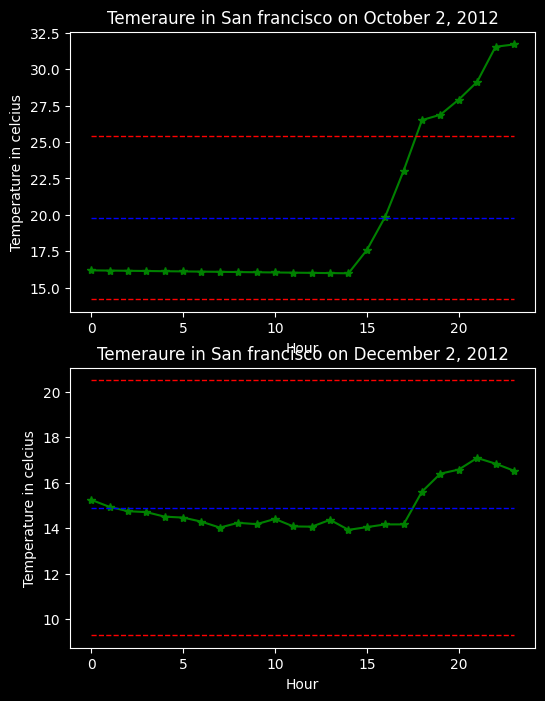

In [ ]:
# Temperature vector for San Francisco for 2012-10-02
t1 = df_temp.iloc[df_temp.index.get_loc('2012-10-02'),df_temp.columns.get_loc('San Francisco')].values #when indexes/position no tknown
t1 = t1-273.15
# print(t1)

# Temperature vector for San Francisco for 2012-12-02
t2 = df_temp.iloc[df_temp.index.get_loc('2012-12-02'),df_temp.columns.get_loc('San Francisco')].values
t2 = t2-273.15 #convert from kelvin to celcius
# print(t2)

# Plot temperature vectors for both days
#canvas creation
fig1, (ax1, ax2)=plt.subplots(2, 1, figsize=(6,8))
#range
#len(df_temp) length along dimension zero
# np.arange(0,10)
# range(0,10)
component_index = range(0,len(t1))

ax1.plot(component_index, t1, color='green', marker='*')
ax1.plot(component_index, [np.mean(t1)]*len(t1), color='blue',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(t1)+np.std(t1)]*len(t1), color='red',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(t1)-np.std(t1)]*len(t1), color='red',
         linestyle='dashed', linewidth=1)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature in celcius')
ax1.set_title('Temeraure in San francisco on October 2, 2012')


ax2.plot(component_index, t2, color='green', marker='*')
ax2.plot(component_index, [np.mean(t2)]*len(t1), color='blue',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(t2)+np.std(t1)]*len(t1), color='red',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(t2)-np.std(t1)]*len(t1), color='red',
         linestyle='dashed', linewidth=1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Temperature in celcius')
ax2.set_title('Temeraure in San francisco on December 2, 2012');


In [ ]:
# np.arange(0,10)
# range(0,10)
component_index = range(0,len(t1))

np.mean(t1)
np.std(t1) #how temp deviate from normal day
ax1.plot(component_index, [np.mean(t1)*len(t1)])

---

Mean-center the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

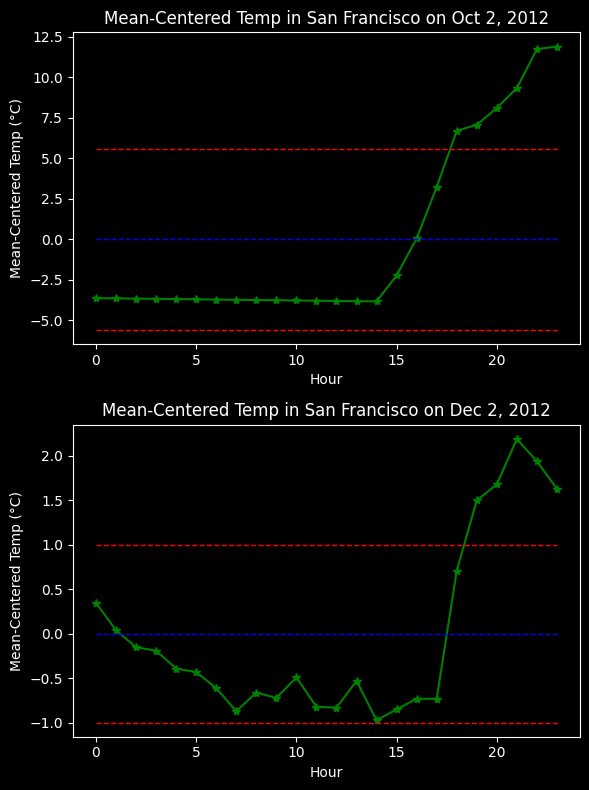

In [ ]:
# # Mean-centered temperature vector for San Francisco for 2012-10-02
# t1_mc = t1-np.mean(t1)
# print(t1_mc)

# # Mean-centered temperature vector for San Francisco for 2012-12-02
# t2_mc = t2-np.mean(t2)
# print(t2_mc)

# # Plot mean-centered temperature vectors for both days
# fig1, (ax1, ax2)=plt.subplots(2, 1, figsize=(6,8))
# #range
# #len(df_temp) length along dimension zero
# # np.arange(0,10)
# # range(0,10)
# component_index = range(0,len(t1))

# ax1.plot(component_index, t1_mc, color='green', marker='*')
# ax1.plot(component_index, [np.mean(t1)]*len(t1), color='blue',
#          linestyle='dashed', linewidth=1)

# ax1.plot(component_index, [np.mean(t1)+np.std(t1)]*len(t1), color='red',
#          linestyle='dashed', linewidth=1)

# ax1.plot(component_index, [np.mean(t1)-np.std(t1)]*len(t1), color='red',
#          linestyle='dashed', linewidth=1)

# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Temperature in celcius')
# ax1.set_title('Temeraure in San francisco on October 2, 2012')


# ax2.plot(component_index, t2, color='green', marker='*')
# ax2.plot(component_index, [np.mean(t2)]*len(t1), color='blue',
#          linestyle='dashed', linewidth=1)

# ax2.plot(component_index, [np.mean(t2)+np.std(t1)]*len(t1), color='red',
#          linestyle='dashed', linewidth=1)

# ax2.plot(component_index, [np.mean(t2)-np.std(t1)]*len(t1), color='red',
#          linestyle='dashed', linewidth=1)
# ax2.set_xlabel('Hour')
# ax2.set_ylabel('Temperature in celcius')
# ax2.set_title('Temeraure in San francisco on December 2, 2012')





# Mean-centered temperature vector for San Francisco for 2012-10-02
t1_mc = t1 - np.mean(t1)
# Mean-centered temperature vector for San Francisco for 2012-12-02
t2_mc = t2 - np.mean(t2)

# Plot mean-centered temperature vectors for both days
fig1, (ax1, ax2)=plt.subplots(2, 1, figsize=(6,8))
#range
#len(df_temp) length along dimension zero
# np.arange(0,10)
# range(0,10)
component_index = range(0,len(t1))
# # Plot t1_mc with mean-centered stats
ax1.plot(component_index, t1_mc, color='green', marker='*')
ax1.plot(component_index, [0]*len(t1_mc), color='blue', linestyle='dashed', linewidth=1)
ax1.plot(component_index, [np.std(t1_mc)]*len(t1_mc), color='red', linestyle='dashed', linewidth=1)
ax1.plot(component_index, [-np.std(t1_mc)]*len(t1_mc), color='red', linestyle='dashed', linewidth=1)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean-Centered Temp (°C)')
ax1.set_title('Mean-Centered Temp in San Francisco on Oct 2, 2012')

# Plot t2_mc with mean-centered stats
ax2.plot(component_index, t2_mc, color='green', marker='*')
ax2.plot(component_index, [0]*len(t2_mc), color='blue', linestyle='dashed', linewidth=1)
ax2.plot(component_index, [np.std(t2_mc)]*len(t2_mc), color='red', linestyle='dashed', linewidth=1)
ax2.plot(component_index, [-np.std(t2_mc)]*len(t2_mc), color='red', linestyle='dashed', linewidth=1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Mean-Centered Temp (°C)')
ax2.set_title('Mean-Centered Temp in San Francisco on Dec 2, 2012')

plt.tight_layout()
plt.show()



---

Standardize daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]
[ 0.34703204  0.03707785 -0.15289407 -0.19288815 -0.39285859 -0.43285268
 -0.61282608 -0.87278765 -0.66281869 -0.72280982 -0.49284382 -0.82279504
 -0.83279356 -0.5328379  -0.97277287 -0.85279061 -0.73280834 -0.73280834
  0.70697883  1.49686207  1.67683547  2.18676009  1.93679704  1.62684286]


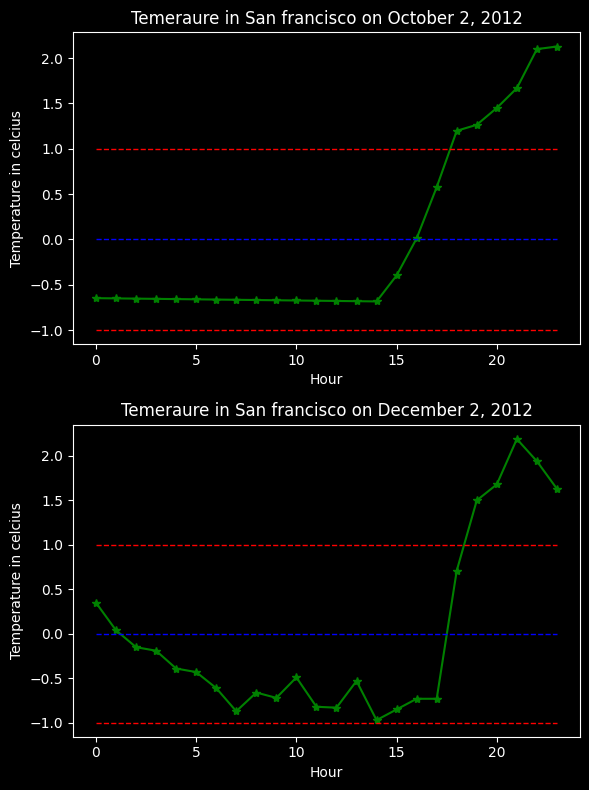

In [ ]:
# Standardized temperature vector for San Francisco for 2012-10-02
z1 = (t1_mc)/(np.std(t1_mc))
print(z1)

# Mean-centered temperature vector for San Francisco for 2012-12-02
z2 = (t2_mc)/(np.std(t2_mc))
print(z2)

# Plot standardized temperature vectors for both days
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))
component_index = range(0,len(z1))

# Plot t1_mc with mean-centered stats
ax1.plot(component_index, z1, color='green', marker='*')
ax1.plot(component_index, [np.mean(z1)]*len(z1), color='blue',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(z1)+np.std(z1)]*len(z1), color='red',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(z1)-np.std(z1)]*len(z1), color='red',
         linestyle='dashed', linewidth=1)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature in celcius')
ax1.set_title('Temeraure in San francisco on October 2, 2012')


ax2.plot(component_index, z2, color='green', marker='*')
ax2.plot(component_index, [np.mean(z2)]*len(z2), color='blue',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(z2)+np.std(z1)]*len(z2), color='red',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(z2)-np.std(z1)]*len(z2), color='red',
         linestyle='dashed', linewidth=1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Temperature in celcius')
ax2.set_title('Temeraure in San francisco on December 2, 2012');
plt.tight_layout()
plt.show()


[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]
[ 0.34703204  0.03707785 -0.15289407 -0.19288815 -0.39285859 -0.43285268
 -0.61282608 -0.87278765 -0.66281869 -0.72280982 -0.49284382 -0.82279504
 -0.83279356 -0.5328379  -0.97277287 -0.85279061 -0.73280834 -0.73280834
  0.70697883  1.49686207  1.67683547  2.18676009  1.93679704  1.62684286]


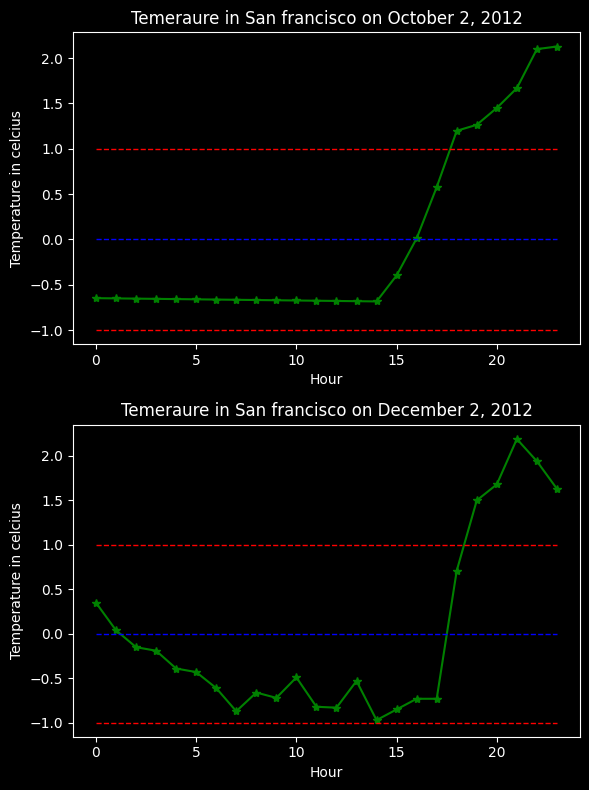

In [ ]:
# Standardized temperature vector for San Francisco for 2012-10-02
z1 = (t1_mc)/(np.std(t1_mc))
print(z1)

# Mean-centered temperature vector for San Francisco for 2012-12-02
z2 = (t2_mc)/(np.std(t2_mc))
print(z2)

# Plot standardized temperature vectors for both days
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))
component_index = range(0,len(z1))

# Plot t1_mc with mean-centered stats

ax1.plot(component_index, z1, color='green', marker='*')
ax1.plot(component_index, [np.mean(z1)]*len(z1), color='blue',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(z1)+np.std(z1)]*len(z1), color='red',
         linestyle='dashed', linewidth=1)

ax1.plot(component_index, [np.mean(z1)-np.std(z1)]*len(z1), color='red',
         linestyle='dashed', linewidth=1)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature in celcius')
ax1.set_title('Temeraure in San francisco on October 2, 2012')


ax2.plot(component_index, z2, color='green', marker='*')
ax2.plot(component_index, [np.mean(z2)]*len(z2), color='blue',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(z2)+np.std(z1)]*len(z2), color='red',
         linestyle='dashed', linewidth=1)

ax2.plot(component_index, [np.mean(z2)-np.std(z1)]*len(z2), color='red',
         linestyle='dashed', linewidth=1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Temperature in celcius')
ax2.set_title('Temeraure in San francisco on December 2, 2012');


# ax1.plot(component_index, z1, color='green', marker='*', label='Standardized Temp')
# ax1.plot(component_index, [np.mean(z1)] * len(z1), color='blue', linestyle='dashed', linewidth=1, label='Mean')
# ax1.plot(component_index, [np.mean(z1) + np.std(z1)] * len(z1), color='red', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
# ax1.plot(component_index, [np.mean(z1) - np.std(z1)] * len(z1), color='red', linestyle='dashed', linewidth=1, label='Mean - Std Dev')

# ax1.set_xlabel('Hour')
# ax1.set_ylabel('Standardized Temperature (°C)')
# ax1.set_title('Temperature in San Francisco on October 2, 2012')
# ax1.legend()

# # Plot for December 2, 2012 (z2)
# ax2.plot(component_index, z2, color='green', marker='*', label='Standardized Temp')
# ax2.plot(component_index, [np.mean(z2)] * len(z2), color='blue', linestyle='dashed', linewidth=1, label='Mean')
# ax2.plot(component_index, [np.mean(z2) + np.std(z2)] * len(z2), color='red', linestyle='dashed', linewidth=1, label='Mean + Std Dev')
# ax2.plot(component_index, [np.mean(z2) - np.std(z2)] * len(z2), color='red', linestyle='dashed', linewidth=1, label='Mean - Std Dev')

# ax2.set_xlabel('Hour')
# ax2.set_ylabel('Standardized Temperature (°C)')
# ax2.set_title('Temperature in San Francisco on December 2, 2012')
# ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

---

Identify outliers in the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012

---

In [ ]:
# Z-score threshold
threshold = 2.0 #number of standadrd deviation beyond which samples are outliers
print(z1)
# print(np.abs(z1) >= threshold)
# np.where(np.abs(z1) >= threshold)
print(f'On 2012-10-02, outliers hours were: {np.where(np.abs(z1) >= threshold)}')
print(f'On 2012-12-02, outliers hours were: {np.where(np.abs(z2) >= threshold)}')

NameError: name 'z1' is not defined

---

Download popular stock prices data from Yahoo Finance for the range August 1, 2024 to August 1, 2025

---

In [ ]:
 np.log(1.2)
 np.log(0.75)

-0.2876820724517809

In [ ]:
print(np.log(1.2)+np.log(0.75)) #log returns are time additive
print(np.log(0.9))
print(np.exp(-0.105))

-0.10536051565782631
-0.10536051565782628
0.9003245225862656


In [ ]:
# dfstock.columns.values[0]
dfstock.columns.values
dfstock.columns

Index(['AAPL', 'AMZN', 'GOOG', 'JNJ', 'JPM', 'META', 'MSFT', 'NVDA', 'TSLA',
       'XOM'],
      dtype='object', name='Ticker')

In [ ]:
# Download stock price data of popular companies
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM'] #list of ticker
dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
dfstock = dfstock.xs('Close', axis = 1, level = 0) #axis/dimensiom
dfstock.dropna(inplace = True) # DROP NA, DROP MISSING VALUES ROWS and update it to df stocks
dfstock.head()

/tmp/ipython-input-2319645754.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097153,184.070007,171.626053,155.687393,203.392670,496.041473,413.256989,109.175514,216.860001,111.967537
2024-08-02,218.588501,167.899994,167.595428,158.960754,194.766373,486.474304,404.716644,107.236115,207.669998,111.900528
2024-08-05,208.059753,161.020004,159.872498,156.161942,190.619476,474.106598,391.499847,100.418274,198.880005,109.880417
2024-08-06,206.031525,161.929993,159.772964,153.953873,195.940002,492.403961,395.918671,104.217079,200.639999,109.296410
2024-08-07,208.606552,162.770004,159.981979,153.886078,195.998688,487.251587,394.749573,98.878769,191.759995,110.751648


In [ ]:
dfstock

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097153,184.070007,171.626053,155.687393,203.392670,496.041473,413.256989,109.175514,216.860001,111.967537
2024-08-02,218.588501,167.899994,167.595428,158.960754,194.766373,486.474304,404.716644,107.236115,207.669998,111.900528
2024-08-05,208.059753,161.020004,159.872498,156.161942,190.619476,474.106598,391.499847,100.418274,198.880005,109.880417
2024-08-06,206.031525,161.929993,159.772964,153.953873,195.940002,492.403961,395.918671,104.217079,200.639999,109.296410
2024-08-07,208.606552,162.770004,159.981979,153.886078,195.998688,487.251587,394.749573,98.878769,191.759995,110.751648
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.637543,231.440002,194.080002,168.300003,298.619995,712.679993,512.866943,173.500000,316.059998,109.382156
2025-07-28,213.807358,232.789993,193.419998,166.220001,298.279999,717.630005,511.658875,176.750000,325.589996,110.412575
2025-07-29,211.030502,231.009995,196.429993,168.110001,297.040009,700.000000,511.728760,175.509995,321.200012,111.839287


In [ ]:
dfstock.shift(1)

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-02,217.097153,184.070007,171.626053,155.687393,203.392670,496.041473,413.256989,109.175514,216.860001,111.967537
2024-08-05,218.588501,167.899994,167.595428,158.960754,194.766373,486.474304,404.716644,107.236115,207.669998,111.900528
2024-08-06,208.059753,161.020004,159.872498,156.161942,190.619476,474.106598,391.499847,100.418274,198.880005,109.880417
2024-08-07,206.031525,161.929993,159.772964,153.953873,195.940002,492.403961,395.918671,104.217079,200.639999,109.296410
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.517670,232.229996,193.199997,169.559998,296.549988,714.799988,510.041534,173.740005,305.299988,109.768562
2025-07-28,213.637543,231.440002,194.080002,168.300003,298.619995,712.679993,512.866943,173.500000,316.059998,109.382156
2025-07-29,213.807358,232.789993,193.419998,166.220001,298.279999,717.630005,511.658875,176.750000,325.589996,110.412575


---

Compute daily log returns as $\log\left(\frac{P_t}{P_{t-1}}\right)$ where $P_t$ is stock price today and $P_{t-1}$ is stock price yesterday. For each company, its log return values can be treated as a vector.

In [ ]:
dfstock

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097168,184.070007,171.626068,155.687393,203.392670,496.041473,413.936340,109.175514,216.860001,111.967537
2024-08-02,218.588486,167.899994,167.595428,158.960739,194.766373,486.474274,405.381958,107.236122,207.669998,111.900520
2024-08-05,208.059738,161.020004,159.872498,156.161942,190.619476,474.106598,392.143433,100.418274,198.880005,109.880402
2024-08-06,206.031525,161.929993,159.772964,153.953873,195.940002,492.403961,396.569519,104.217079,200.639999,109.296402
2024-08-07,208.606567,162.770004,159.981964,153.886108,195.998688,487.251587,395.398499,98.878769,191.759995,110.751648
...,...,...,...,...,...,...,...,...,...,...
2025-07-25,213.637543,231.440002,194.080002,168.300003,298.619995,712.679993,513.710022,173.500000,316.059998,109.382156
2025-07-28,213.807358,232.789993,193.419998,166.220001,298.279999,717.630005,512.500000,176.750000,325.589996,110.412575
2025-07-29,211.030502,231.009995,196.429993,168.110001,297.040009,700.000000,512.570007,175.509995,321.200012,111.839287


In [ ]:
# Compute log returns
log_return= np.log(dfstock/dfstock.shift(1)).dropna()
# log_return = np.log(dfstock / dfstock.shift(1)).dropna()

log_return.head()

Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-02,0.006846,-0.091948,-0.023765,0.020807,-0.043338,-0.019475,-0.020882,-0.017924,-0.043302,-0.000599
2024-08-05,-0.049366,-0.041840,-0.047176,-0.017764,-0.021522,-0.025752,-0.033202,-0.065689,-0.043249,-0.018218
2024-08-06,-0.009796,0.005635,-0.000623,-0.014241,0.027529,0.037867,0.011224,0.037132,0.008811,-0.005329
2024-08-07,0.012421,0.005174,0.001307,-0.000440,0.000299,-0.010519,-0.002957,-0.052581,-0.045268,0.013227
2024-08-08,0.016496,0.018444,0.019040,0.008273,0.018099,0.041486,0.010635,0.059464,0.036256,0.018924


---

The risk or volatility associated with a stock can be quantified by the standard deviation of the log returns of that stock.

First, compute the volatility in the log returns of TSLA. Then, compute the volatility in the log returns of the all the stocks and plot them in a bar plot in descending order.

---

Volatility in the log returns of TSLA = 0.04491792081038267
Volatility in the log returns of all stocks =
Ticker
AAPL    0.019815
AMZN    0.021501
GOOG    0.019647
JNJ     0.012190
JPM     0.017553
META    0.022929
MSFT    0.015702
NVDA    0.034123
TSLA    0.045008
XOM     0.015349
dtype: float64


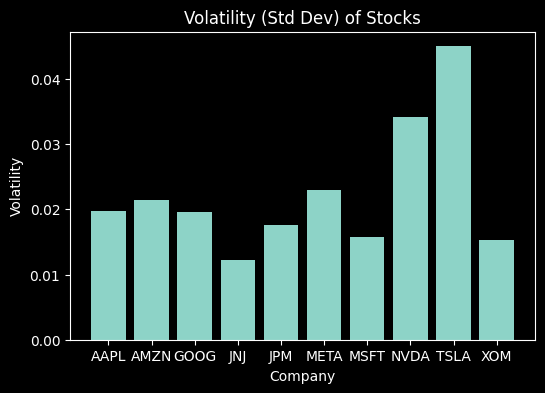

In [ ]:
# Compute standard deviation a.k.a. volatility a.k.a. risk of TSLA
a = log_return['TSLA'].values
volatility_TSLA = np.std(a)   # Std deviation of TSLA's log returns
print(f'Volatility in the log returns of TSLA = {volatility_TSLA}')

# All stocks volatilities
volatilities = log_return.std()   # Std deviation for each stock (pandas)
print(f'Volatility in the log returns of all stocks =\n{volatilities}')

# Plot volatilities
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.bar(volatilities.index, volatilities.values)  # Company names vs vol values
ax.set_xlabel('Company')
ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks')
plt.show()


Volatility in the log returns of TSLA = 0.044917920810382664
Volatility in the log returns of all stocks =
 Ticker
TSLA    0.045008
NVDA    0.034123
META    0.022929
AMZN    0.021501
AAPL    0.019815
GOOG    0.019647
JPM     0.017553
MSFT    0.015702
XOM     0.015349
JNJ     0.012190
dtype: float64


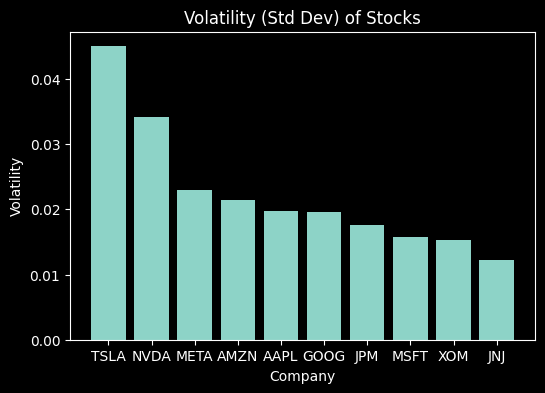

In [ ]:
# Compute standard deviation a.k.a. volatility a.k.a. risk of TSLA
a = log_return['TSLA'].values #series
volatility_TSLA = np.sqrt(np.dot(a-np.mean(a), a-np.mean(a))/len(a)) #std deviation
print(f'Volatility in the log returns of TSLA = {volatility_TSLA}')

# All stocks volatilities
volatilities = log_return.std()
volatilities=volatilities.sort_values(ascending=False)
print(f'Volatility in the log returns of all stocks =\n {volatilities}')

# Plot volatilities
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.bar(volatilities.index, volatilities.values)
ax.set_xlabel('Company')
ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks');

#log returns...hence small
#most risky : tesla

---

The covariance between two vectors is a measure of how the two vectors co-vary about their respective means. It is calculated as the average dot product of their mean-centered versions. If $\mathbf{a}_{mc}$ and $\mathbf{b}_{mc}$ represent the mean-centered versions of vectors $\mathbf{a}$ and $\mathbf{b},$ respectively, then the covariance between $\mathbf{a}$ and $\mathbf{b}$ is denoted and calculated as $$\text{cov}(\mathbf{a},\mathbf{b}) = \frac{1}{n}\times\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right).$$

In the component plot below of mean-centered heart rate and blood pressure values, it can be seen that the heart rates and blood pressures of the patients are co-varying similarly; that is, as the heart rate increases or decreases w.r.t. the average heart rate from one patient to another, the blood pressure also typically does the same w.r.t the average blood pressure.

![Covariance](https://1drv.ms/i/c/37720f927b6ddc34/IQTLFeKh-TzhSpSSm3swzRsaAarPH-HPV-j9tmHPV7eiDuY?width=375&height=580)

Calculate the covariance between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make component plots of the log returns of AAPL and AMZN. Do you see the stocks co-varying similarly?

Modify the component plots to show the mean-centered log returns. Now do you see the stocks co-varying similarly?



---

Covariance between AAPL and AMZN log returns = [[0.00039262 0.00024667]
 [0.00024667 0.00046231]]


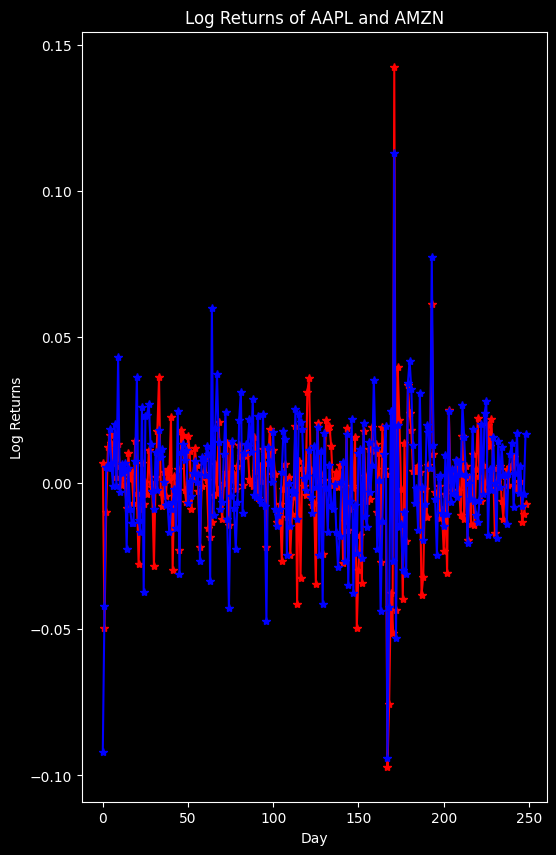

In [ ]:
# Covariance between log returns of APPL and AMZN
a = log_return['AAPL'].values
a_mc = a-np.mean(a)
b = log_return['AMZN'].values
b_mc = b-np.mean(b)
# cov = np.dot(a_mc,b_mc)/len(a)
cov=np.cov(a,b)
print(f'Covariance between AAPL and AMZN log returns = {cov}');

# Component plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 10))
component_index = range(0, len(log_return))
ax.plot(component_index, a, color = 'red', marker = '*')
ax.plot(component_index, b, color = 'blue', marker = '*')
ax.set_xlabel('Day')
ax.set_ylabel('Log Returns')
ax.set_title( 'Log Returns of AAPL and AMZN');

---

Compute the covariance between all pairs of log returns. The resulting matrix, denoted as $\pmb{\Sigma}$ is called the covariance matrix.

From that matrix, are you able to identify stocks that co-vary?

---

In [ ]:
# Covariance matrix matrix of log returns
# covmatrix = np.cov(log_return)
covmatrix = log_return.cov() #evident, log reurns are proportinal, provides varying difference
print(covmatrix) #the diagonal are risk

Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.000393  0.000247  0.000193  0.000021  0.000164  0.000250  0.000175   
AMZN    0.000247  0.000462  0.000272 -0.000039  0.000211  0.000364  0.000242   
GOOG    0.000193  0.000272  0.000386 -0.000032  0.000140  0.000242  0.000167   
JNJ     0.000021 -0.000039 -0.000032  0.000149  0.000019 -0.000047 -0.000027   
JPM     0.000164  0.000211  0.000140  0.000019  0.000308  0.000188  0.000123   
META    0.000250  0.000364  0.000242 -0.000047  0.000188  0.000526  0.000244   
MSFT    0.000175  0.000242  0.000167 -0.000027  0.000123  0.000244  0.000247   
NVDA    0.000299  0.000426  0.000340 -0.000108  0.000249  0.000439  0.000335   
TSLA    0.000428  0.000514  0.000464 -0.000030  0.000364  0.000498  0.000328   
XOM     0.000122  0.000077  0.000058  0.000039  0.000106  0.000080  0.000035   

Ticker      NVDA      TSLA       XOM  


---

The correlation coefficient between two vectors $\mathbf{a}$ and $\mathbf{c}$ is a normalized measure (between -1 and 1) of their covariance which is denoted and calculated as $$\text{cor}(\mathbf{a},\mathbf{b}) = \frac{\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right)}{\lVert \mathbf{a}_{mc}\rVert_2\lVert\mathbf{b}_{mc}\rVert_2}.$$ Note that the cauchy-Schwarz inequality guarantees that the above quantity is between -1 and 1.

If the correlation coefficient is close to 1, then as one vector's components increase, the other vectors components also increase typically along a straight line. If the correlation coefficient is close to -1, then as one vector's components increase, the other vectors components decrease typically along a straight line.

Compute the correlation coefficient between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make a scatter plot of the log returns of AAPL and AMZN. Does the plot indicate that the two stocks co-vary similarly?

---

covariance between AAPL and AMZN log returns = [[0.00039262 0.00024667]
 [0.00024667 0.00046231]]
Correation coefficient between AAPL and AMZN log returns = [[1.         0.57899384]
 [0.57899384 1.        ]]


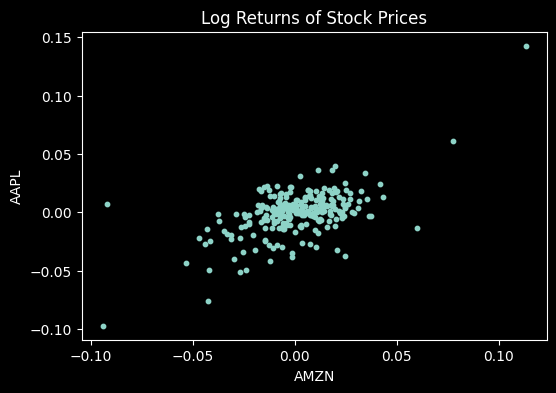

In [ ]:
# Correlation between APPL and AMZN)
corr = np.corrcoef(a,b) #no need to mean center for cor
print(f'covariance between AAPL and AMZN log returns = {np.cov(a,b)}')
print(f'Correation coefficient between AAPL and AMZN log returns = {corr}')


# Scatter plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.scatter(log_return['AMZN'], log_return['AAPL'],s=10)
ax.set_xlabel('AMZN')
ax.set_ylabel('AAPL')
ax.set_title('Log Returns of Stock Prices');#each point is a day, mahanolobis

---

Compute the correlation coefficient between all pairs of log returns and visualize the resulting correlation matrix. From that, identify stocks that co-vary typically.

---

In [ ]:
corrmatrix = log_return.corr()
print(corrmatrix)

Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    1.000000  0.578994  0.495729  0.085638  0.470447  0.550175  0.563963   
AMZN    0.578994  1.000000  0.644258 -0.150147  0.557740  0.737865  0.715403   
GOOG    0.495729  0.644258  1.000000 -0.132492  0.405255  0.537130  0.540948   
JNJ     0.085638 -0.150147 -0.132492  1.000000  0.086823 -0.167628 -0.143414   
JPM     0.470447  0.557740  0.405255  0.086823  1.000000  0.467597  0.447861   
META    0.550175  0.737865  0.537130 -0.167628  0.467597  1.000000  0.678692   
MSFT    0.563963  0.715403  0.540948 -0.143414  0.447861  0.678692  1.000000   
NVDA    0.442177  0.580955  0.506882 -0.259723  0.415700  0.561024  0.624664   
TSLA    0.479895  0.530854  0.525204 -0.055565  0.460607  0.482292  0.464444   
XOM     0.402426  0.233551  0.191923  0.210414  0.394069  0.226467  0.145205   

Ticker      NVDA      TSLA       XOM  


Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    1.000000  0.578994  0.495729  0.085638  0.470447  0.550175  0.563963   
AMZN    0.578994  1.000000  0.644258 -0.150147  0.557740  0.737865  0.715403   
GOOG    0.495729  0.644258  1.000000 -0.132492  0.405255  0.537130  0.540948   
JNJ     0.085638 -0.150147 -0.132492  1.000000  0.086823 -0.167628 -0.143414   
JPM     0.470447  0.557740  0.405255  0.086823  1.000000  0.467597  0.447861   
META    0.550175  0.737865  0.537130 -0.167628  0.467597  1.000000  0.678692   
MSFT    0.563963  0.715403  0.540948 -0.143414  0.447861  0.678692  1.000000   
NVDA    0.442177  0.580955  0.506882 -0.259723  0.415700  0.561024  0.624664   
TSLA    0.479895  0.530854  0.525204 -0.055565  0.460607  0.482292  0.464444   
XOM     0.402426  0.233551  0.191923  0.210414  0.394069  0.226467  0.145205   

Ticker      NVDA      TSLA       XOM  


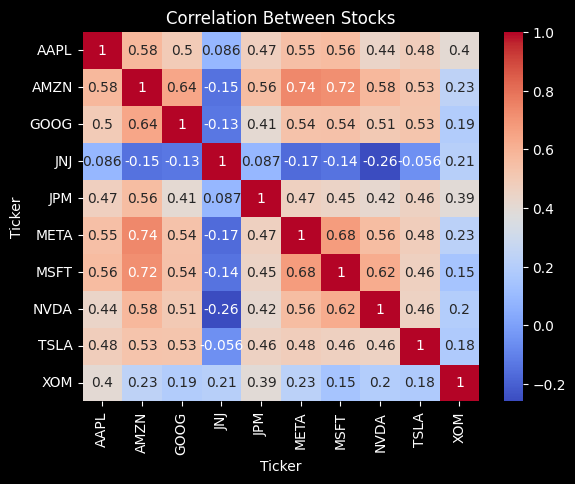

In [ ]:
# Correlation matrix of log returns
corrmatrix = log_return.corr()
print(corrmatrix)
sns.heatmap(corrmatrix, cmap='coolwarm', annot=True);
plt.title("Correlation Between Stocks")
plt.show() #negative corealtion red

---

The average log return (or simply return) associated with a stock (AAPL) is simply the average or mean of the log returns of the that stock. For example, if we denote the log returns of AAPL as an $n$-vector $\mathbf{a},$ then its average log return in pen & paper can be written as $$\frac{1}{n}\times\left(a_1+a_2+\cdots+a_n\right) = \frac{1}{n}\times\left(\pmb{1}\cdot\mathbf{a}\right),$$ where $\pmb{1}$ is an $n$-vector whose elements are all equal to ones.

For a blended investment on the 10 stocks (called a portfolio) with weights that add up to 1 and represented as the vector $$\mathbf{w}=\begin{bmatrix}w_1\\w_2\\w_3\\\vdots\\w_{10}\end{bmatrix},$$
- the averate return can be shown to be $\mathbf{w}\cdot\mathbf{r},$ where $\mathbf{r}$ is the vector of average returns of all the 10 stocks;
- the overall risk (or simply risk) in the portfolio is $\mathbf{w}\cdot\left(\pmb{\Sigma}\mathbf{w}\right),$ which takes into account the individual volatility of each stock and their co-movement w.r.t. the other stocks.

Try to come up with a portfolio (that is, values for the components of the weights vector $\mathbf{w})$ that results in the best return-to-risk ratio. The best return-to-risk ratio is also referred to as the sharpe ratio.

---

In [ ]:
# Optnimizing portfolio
print(0.5*np.mean(log_return['AAPL']),0.5*np.mean(log_return['AMZN']))
print(np.std(log_return['AAPL']))

-0.00018478135976798357
0.01977480901989679


In [ ]:
r = log_return.mean().values
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
average_return = np.dot(w, r)
print(average_return)
s = log_return.cov()
# print(type(s))
overall_risk = (np.dot(w,np.dot(s,w)))
print(average_return / overall_risk)
# print(overall_risk)
portfolio_risk = np.sqrt(overall_risk)
sharpe_ratio = average_return / portfolio_risk
print("Sharpe Ratio:", sharpe_ratio)

0.0009113350777547109
3.778578023775717
Sharpe Ratio: 0.058681774829157006


In [ ]:
import numpy as np

# Assume r and Sigma are defined as before

# Step 1: inverse covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Step 2: vector of ones
ones = np.ones(len(r))

# Step 3: compute raw weights
raw_weights = np.dot(Sigma_inv, r)

# Step 4: normalize weights so they sum to 1
weights = raw_weights / np.dot(ones, raw_weights)

print("Optimal portfolio weights:\n", weights)

# Calculate portfolio return
portfolio_return = np.dot(weights, r)

# Calculate portfolio risk (std dev)
portfolio_risk = np.sqrt(np.dot(weights, np.dot(Sigma, weights)))

# Calculate Sharpe ratio
sharpe_ratio = portfolio_return / portfolio_risk

print("Sharpe ratio:", sharpe_ratio)


Optimal portfolio weights:
 [-0.70436427 -0.31501454 -0.07764522  0.52710358  0.72535796  0.57901211
  0.41316903  0.13385598 -0.02416196 -0.25731267]
Sharpe ratio: 0.1434660643910298


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Average returns vector
r = log_return.mean().values

# Covariance matrix as numpy array
s = log_return.cov().values

def neg_sharpe(w, r, s):
    port_return = np.dot(w, r)
    port_var = np.dot(w, np.dot(s, w))
    port_risk = np.sqrt(port_var)
    return -port_return / port_risk  # negative Sharpe (to minimize)

# Constraint: weights sum to 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

# Bounds: no short selling, weights between 0 and 1
bounds = [(0, 1) for _ in range(len(r))]

# Initial guess: equal weights
w0 = np.ones(len(r)) / len(r)

result = minimize(neg_sharpe, w0, args=(r, s), bounds=bounds, constraints=constraints)

optimal_weights = result.x
optimal_sharpe = -result.fun

print("Optimal weights:")
for i, w in enumerate(optimal_weights):
    print(f"Stock {i+1}: {w:.4f}")
print(f"Maximum Sharpe Ratio: {optimal_sharpe:.4f}")


Optimal weights:
Stock 1: 0.0000
Stock 2: 0.0000
Stock 3: 0.0000
Stock 4: 0.2655
Stock 5: 0.3944
Stock 6: 0.2540
Stock 7: 0.0405
Stock 8: 0.0455
Stock 9: 0.0000
Stock 10: 0.0000
Maximum Sharpe Ratio: 0.0991


In [ ]:
r=log_return.mean().values
W=np.array([0.00,0.00,0.00,])
Avg_return=(np.dot(W,r))
S=np.array(log)

In [ ]:
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]],
                 dtype = torch.float64,requires_grad=True)

sc = StandardScaler() # create a standard scaler object

X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)


optimizer=torch.optim.Adam([W],lr=1e-02)
def loss_fn(W):
  Z = torch.matmul(X_std, W)
  softmax = torch.nn.Softmax(dim = 1)
  A = softmax(Z)
  L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
  return L
num_epochs=10000

for epoch in range(num_epochs):
  #zero out the gradients
  optimizer.zero_grad()
  #Loss calculation
  loss=loss_fn(W)
  loss.backward()
  optimizer.step()
  if epoch%1000==0:
    print(f'Epoch{epoch},loss={loss.item()}')
print(W)

Epoch0,loss=1.2303940464309857
Epoch1000,loss=0.018399732280405298
Epoch2000,loss=0.005553742501022239
Epoch3000,loss=0.0024706458206458126
Epoch4000,loss=0.0012747228155419502
Epoch5000,loss=0.0007065782346071862
Epoch6000,loss=0.00040700132319583683
Epoch7000,loss=0.0002395832067849751
Epoch8000,loss=0.00014282078783290256
Epoch9000,loss=8.57742685444377e-05
tensor([[  6.7107,  -2.7438,   1.0328],
        [ -9.0516,  -3.2974,   6.8151],
        [ -5.3327,  -2.6336,  13.2100],
        [  5.1068,  -3.9332, -15.8885],
        [ -1.4233,   6.5601,  -1.1260]], dtype=torch.float64,
       requires_grad=True)


In [ ]:
X=np.array([[76,126,38],
           [74,120,38],
           [72,118,37.5],
           [78,136,37]])
print(X)
v=np.array([1,1,1]) # Define v here
v=v/np.linalg.norm(v)
print(v) #direction of vector v
print(np.dot(X,v)) #matrix vector product=sequence of dot product, how ecah patient llok like in projected world
mu=np.mean(X,axis=0)
print(mu) #average patient
print(np.dot(mu,v))
# X_norm=(X-mu)/np.linalg.norm(X-mu)
# print(X_norm)
print(np.mean(np.dot(mu,v))) #average projection of x patients on direction v
print(np.var(np.dot(X,v))) #variance ..138-137

[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]
[0.57735027 0.57735027 0.57735027]
[138.56406461 133.94526245 131.34718624 144.91491757]
[ 75.    125.     37.625]
137.19285771618485
137.19285771618485
26.55729166666677
